In [17]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [18]:
dataset = pd.read_csv("new_model.csv", header=0)    
X = dataset.values[:,0:13]   # explanatory variables
y = dataset['Class']     # clustering variable,  0 - no risk of kidney disease,  1 - risk of kidney disease

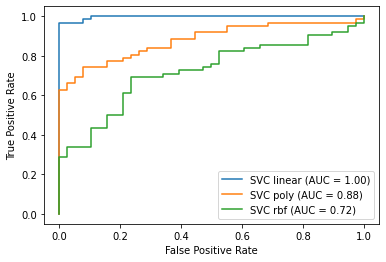

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# evaluation on a test set
fig, ax = plt.subplots() 
svc = SVC(kernel='linear')    # classificator
svc.fit(X_train, y_train)      # training
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC linear')   
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC poly')
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
plot_roc_curve(svc1, X_test, y_test, ax=ax, name='SVC rbf')
plt.show() 

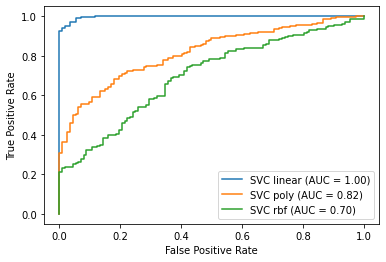

In [20]:
# evaluation on a train set
fig, ax = plt.subplots() 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_train, y_train, ax=ax, name='SVC linear')
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_train, y_train, ax=ax, name='SVC poly')
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
plot_roc_curve(svc1, X_train, y_train, ax=ax, name='SVC rbf')
plt.show() 


Accuracy (train): 0.963
Accuracy (test): 0.98 


Classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        62

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Confusion matrix
    0   1
0  38   0
1   2  60

Confusion matrix - plot


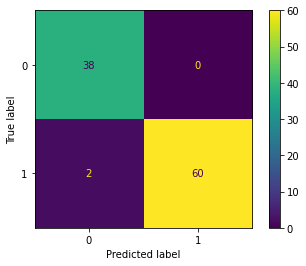

In [27]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)

print('\nAccuracy (train): %.3f' % accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n')

print('\nClassification report')
labels = np.unique(y)   
print(classification_report(y_test, y_test_pred, labels=labels)) 

print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_test_pred)  
print(pd.DataFrame(cm, index=labels, columns=labels))

print('\nConfusion matrix - plot')
pcm = plot_confusion_matrix(svc, X_test, y_test, labels=labels)
ConfusionMatrixDisplay(pcm, display_labels=labels)
plt.show() 